<a href="https://colab.research.google.com/github/MichaelTriesCoding/Assignment-1/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 49.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


Accuracy: 0.7532
Precision: 0.6491
Recall: 0.6727
F1 Score: 0.6607


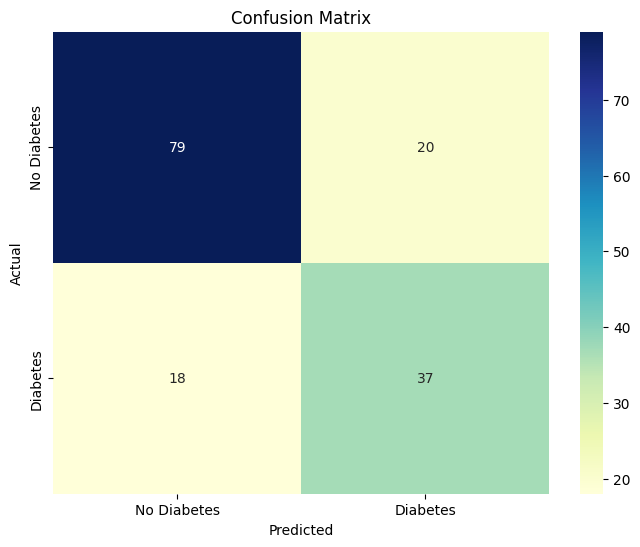

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the diabetes dataset
diabetes_df = pd.read_csv('diabetes.csv')

# Split the data into features and target
X = diabetes_df.drop(columns=['Outcome'])
y = diabetes_df['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Manually plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Problem 2

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433
F1 Score: 0.9701492537313433


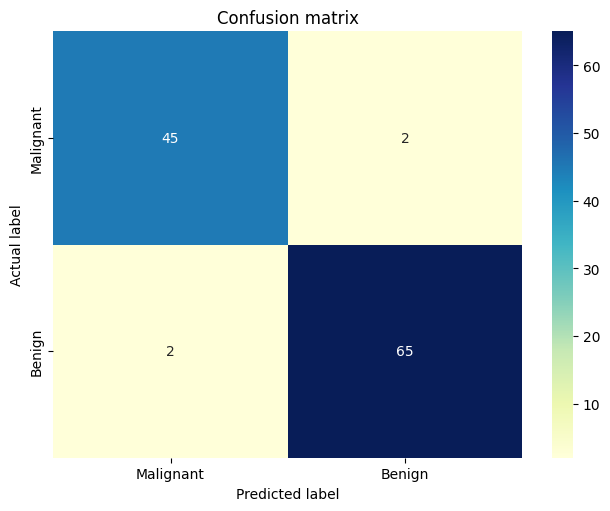

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Load the cancer dataset from the provided CSV file
cancer_data = pd.read_csv('cancer.csv')

# Replace "M" with 0 and "B" with 1 for the 'diagnosis' column
cancer_data['diagnosis'].replace({'M': 0, 'B': 1}, inplace=True)

# Drop the 'id' column if it exists
if 'id' in cancer_data.columns:
    cancer_data.drop(columns=['id'], inplace=True)

# Define features and target
X = cancer_data.drop(columns=['diagnosis'])
y = cancer_data['diagnosis']

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split into training and validation sets
x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Scale the data using standardization
sc_x1 = StandardScaler()
x1_train = sc_x1.fit_transform(x1_train)
x1_test = sc_x1.transform(x1_test)

def perform_logistic_regression(x_train, y_train, x_test, y_test):
    """
    Performs logistic regression, making predictions and creating a confusion matrix.
    Also prints the accuracy, precision, recall, and F1 score.

    Parameters:
    x_train : The input data from the training set
    y_train : The output data from the training set
    x_test : The input data from the test set
    y_test : The output data from the test set

    Returns:
    cnf_matrix : A 2D array containing true negative, false positive, false negative, and true positive (in that order)
    """
    classifier = LogisticRegression(random_state=0)
    classifier.fit(x_train, y_train)

    # Make predictions
    y_pred = classifier.predict(x_test)

    # Find confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)

    # Find accuracy, precision, recall, and F1 score
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

    return cnf_matrix

def plot_confusion_matrix(confusion_matrix, neg_label, pos_label):
    """
    Plots the confusion matrix.

    Parameters:
    confusion_matrix: The 4 values for true negative, false positive, false negative, and true positive (in that order)
    """
    # Visualize the confusion matrix using a heatmap
    class_names=[neg_label, pos_label] # Name of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)

    # Create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("bottom")
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    plt.tight_layout()
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# Perform logistic regression and return confusion matrix
confusion_matrix_1a = perform_logistic_regression(x1_train, y1_train, x1_test, y1_test)

# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix=confusion_matrix_1a, neg_label='Malignant', pos_label='Benign')

plt.show()


# Load the cancer dataset from the provided CSV file to show original
cancer_data = pd.read_csv('cancer.csv')Problem 2 Part 2

C: 20
Training accuracy:	0.9890
Test accuracy:		0.9561

C: 10
Training accuracy:	0.9890
Test accuracy:		0.9474

C: 1
Training accuracy:	0.9890
Test accuracy:		0.9561

C: 0.1
Training accuracy:	0.9758
Test accuracy:		0.9737

C: 0.01
Training accuracy:	0.9275
Test accuracy:		0.9211

Accuracy: 0.9736842105263158
Precision: 0.9705882352941176
Recall: 0.9850746268656716
F1 Score: 0.9777777777777777
Without Class Weight:
Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433
F1 Score: 0.9701492537313433


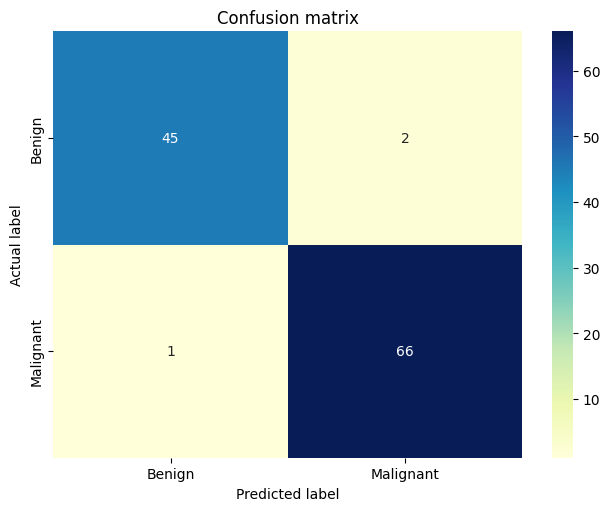

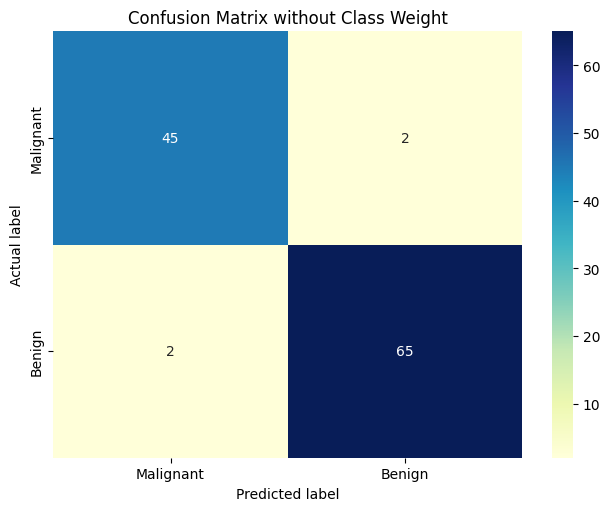

In [72]:
# Load the cancer dataset from the provided CSV file to show original
cancer_data = pd.read_csv('cancer.csv')

C = [20, 10, 1, .1, .01]
x1b_train =  x1_train
x1b_test = x1_test

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(x1b_train, y1_train)
    print('C:', c)
    print('Training accuracy:\t%5.4f' %clf.score(x1b_train, y1_train))
    print('Test accuracy:\t\t%5.4f' %clf.score(x1b_test, y1_test))
    print('')

    # Selecting the best penalty and making the regression with it
clf = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
clf.fit(x1b_train, y1_train)
y1b_pred = clf.predict(x1b_test)

# Find accuracy, precision, and recall
print("Accuracy:", metrics.accuracy_score(y1_test, y1b_pred))
print("Precision:", metrics.precision_score(y1_test, y1b_pred))
print("Recall:", metrics.recall_score(y1_test, y1b_pred))
print("F1 Score:", metrics.f1_score(y1_test, y1b_pred))

# Find confusion matrix
confusion_matrix_1b = confusion_matrix(y1_test, y1b_pred)

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix=confusion_matrix_1b, neg_label='Benign', pos_label='Malignant')


# Replace "M" with 0 and "B" with 1 for the 'diagnosis' column
cancer_data['diagnosis'].replace({'M': 0, 'B': 1}, inplace=True)

# Drop the 'id' column if it exists
if 'id' in cancer_data.columns:
    cancer_data.drop(columns=['id'], inplace=True)

# Define features and target
X = cancer_data.drop(columns=['diagnosis'])
y = cancer_data['diagnosis']

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split into training and validation sets
x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Scale the data using standardization
sc_x1 = StandardScaler()
x1_train = sc_x1.fit_transform(x1_train)
x1_test = sc_x1.transform(x1_test)

def perform_logistic_regression(x_train, y_train, x_test, y_test, class_weight=None):
    """
    Performs logistic regression with optional class weight, making predictions and creating a confusion matrix.
    Also prints the accuracy, precision, recall, and F1 score.

    Parameters:
    x_train : The input data from the training set
    y_train : The output data from the training set
    x_test : The input data from the test set
    y_test : The output data from the test set
    class_weight : Weights associated with classes in the form {class_label: weight}

    Returns:
    cnf_matrix : A 2D array containing true negative, false positive, false negative, and true positive (in that order)
    """
    classifier = LogisticRegression(random_state=0, class_weight=class_weight)
    classifier.fit(x_train, y_train)

    # Make predictions
    y_pred = classifier.predict(x_test)

    # Find confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)

    # Find accuracy, precision, recall, and F1 score
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

    return cnf_matrix

def plot_confusion_matrix(confusion_matrix, neg_label, pos_label):
    """
    Plots the confusion matrix.

    Parameters:
    confusion_matrix: The 4 values for true negative, false positive, false negative, and true positive (in that order)
    """
    # Visualize the confusion matrix using a heatmap
    class_names = [neg_label, pos_label]  # Name of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)

    # Create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("bottom")
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    plt.tight_layout()
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# Perform logistic regression without class weight and return confusion matrix
print("Without Class Weight:")
confusion_matrix_1a = perform_logistic_regression(x1_train, y1_train, x1_test, y1_test)

# Plot the confusion matrix without class weight
plot_confusion_matrix(confusion_matrix=confusion_matrix_1a, neg_label='Malignant', pos_label='Benign')
plt.title('Confusion Matrix without Class Weight')
plt.show()

Problem 3

In [74]:
#Split into training with validation
x1_train, x1_test, y1_train, y1_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)


#create the Bayesian model using Gaussian classifier
classifier = GaussianNB()
classifier.fit(x1_train, y1_train)
y2_pred = classifier.predict(x1_test)

Part 2

Accuracy: 0.9298245614035088
Precision: 0.9402985074626866
Recall: 0.9402985074626866
F1 Score: 0.9402985074626865


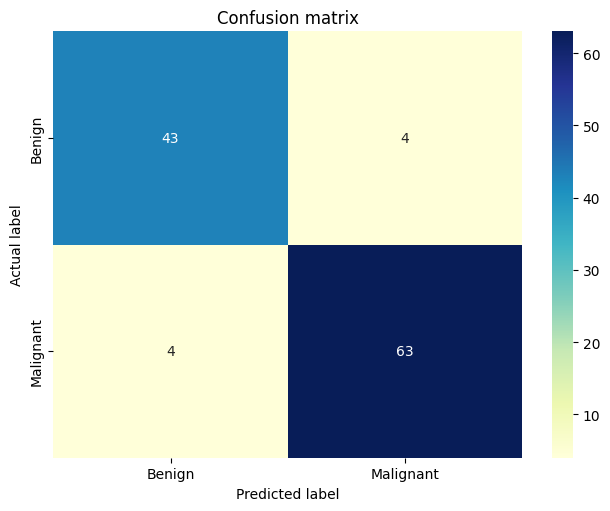

In [75]:
#Find accuracy, precision, and recall
print("Accuracy:", metrics.accuracy_score(y1_test, y2_pred))
print("Precision:", metrics.precision_score(y1_test, y2_pred))
print("Recall:", metrics.recall_score(y1_test, y2_pred))
print("F1 Score:", metrics.f1_score(y1_test, y2_pred))

#Findmatrix
confusion_matrix_2a = confusion_matrix(y1_test, y2_pred)

#Plot matrix
plot_confusion_matrix(confusion_matrix=confusion_matrix_2a, neg_label='Benign', pos_label='Malignant')


Problem 4

K = 1:
Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298
F1 Score: 0.9172932330827067


K = 2:
Accuracy: 0.9298245614035088
Precision: 0.9682539682539683
Recall: 0.9104477611940298
F1 Score: 0.9384615384615386


K = 3:
Accuracy: 0.9122807017543859
Precision: 0.9384615384615385
Recall: 0.9104477611940298
F1 Score: 0.9242424242424243


K = 4:
Accuracy: 0.9473684210526315
Precision: 0.9552238805970149
Recall: 0.9552238805970149
F1 Score: 0.9552238805970149


K = 5:
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
F1 Score: 0.962962962962963


K = 6:
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
F1 Score: 0.962962962962963


K = 7:
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
F1 Score: 0.962962962962963


K = 8:
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
F1 Score: 0.962962962962963


K = 9:
Accuracy:

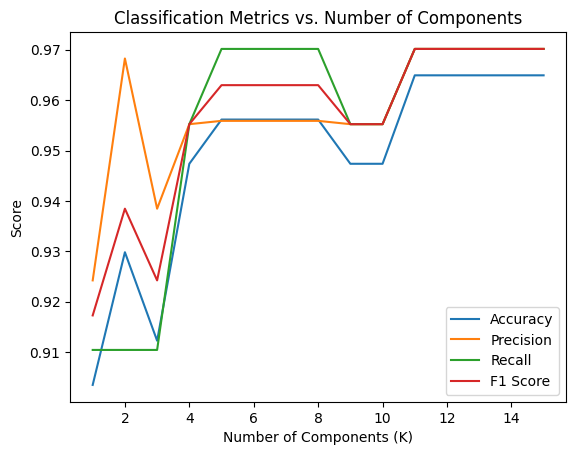

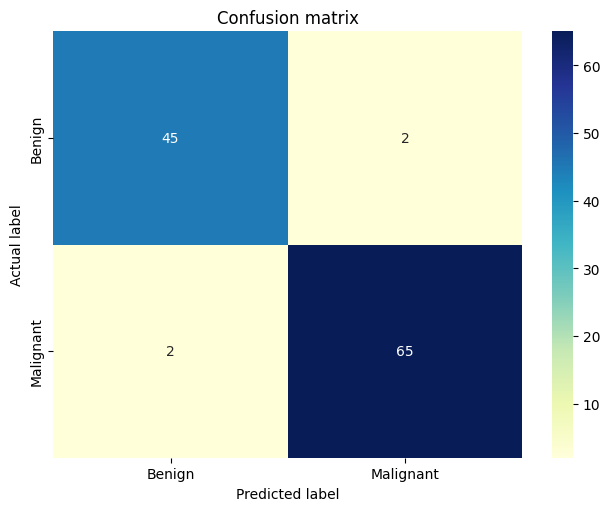

In [52]:
# Perform standardization on the features
X4 = StandardScaler().fit_transform(X)

# Select N values from 1 to 15 for the number of principal components
N = list(range(1, 16))

# Initialize lists to store metrics for each value of N
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for K in N:
    # Perform PCA to reduce the dimensionality
    pca = PCA(n_components=K)
    principalDf = pd.DataFrame(data=pca.fit_transform(X4))

    # Split the data into training and validation sets
    x3_train, x3_test, y3_train, y3_test = train_test_split(principalDf.values, Y, train_size=0.8, test_size=0.2, random_state=0)

    # Perform logistic regression
    classifier = LogisticRegression(random_state=0)
    classifier.fit(x3_train, y3_train)

    # Make predictions
    y3_pred = classifier.predict(x3_test)

    # Calculate metrics
    accuracy1 = accuracy_score(y3_test, y3_pred)
    precision1 = precision_score(y3_test, y3_pred)
    recall1 = recall_score(y3_test, y3_pred)
    f1_score1 = f1_score(y3_test, y3_pred)

    # Append metrics to respective lists
    accuracy_list.append(accuracy1)
    precision_list.append(precision1)
    recall_list.append(recall1)
    f1_score_list.append(f1_score1)

    # Print metrics for the current value of K
    print(f"K = {K}:")
    print("Accuracy:", accuracy1)
    print("Precision:", precision1)
    print("Recall:", recall1)
    print("F1 Score:", f1_score1)
    print('\n')

# Plotting the metrics
plt.plot(N, accuracy_list, label='Accuracy')
plt.plot(N, precision_list, label='Precision')
plt.plot(N, recall_list, label='Recall')
plt.plot(N, f1_score_list, label='F1 Score')
plt.xlabel('Number of Components (K)')
plt.ylabel('Score')
plt.title('Classification Metrics vs. Number of Components')
plt.legend()
plt.show()

# Confusion matrix for the final value of K
confusion_matrix_3b = confusion_matrix(y3_test, y3_pred)

# Plot confusion matrix
def plot_confusion_matrix(confusion_matrix, neg_label, pos_label):
    """
    Plots the confusion matrix.

    Parameters:
    confusion_matrix: The 4 values for true negative, false positive, false negative, and true positive (in that order)
    """
    class_names = [neg_label, pos_label]  # Name of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)

    # Create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("bottom")
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    plt.tight_layout()
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# Plot the confusion matrix for the final value of K
plot_confusion_matrix(confusion_matrix=confusion_matrix_3b, neg_label='Benign', pos_label='Malignant')
plt.show()


Problem 5

K = 1:
Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298
F1 Score: 0.9172932330827067


K = 2:
Accuracy: 0.9122807017543859
Precision: 0.9253731343283582
Recall: 0.9253731343283582
F1 Score: 0.9253731343283582


K = 3:
Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298
F1 Score: 0.9172932330827067


K = 4:
Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298
F1 Score: 0.9172932330827067


K = 5:
Accuracy: 0.9210526315789473
Precision: 0.9142857142857143
Recall: 0.9552238805970149
F1 Score: 0.9343065693430657


K = 6:
Accuracy: 0.9210526315789473
Precision: 0.9142857142857143
Recall: 0.9552238805970149
F1 Score: 0.9343065693430657


K = 7:
Accuracy: 0.9122807017543859
Precision: 0.9130434782608695
Recall: 0.9402985074626866
F1 Score: 0.9264705882352942


K = 8:
Accuracy: 0.9122807017543859
Precision: 0.9130434782608695
Recall: 0.9402985074626866
F1 Score: 0.9264705882352942


K = 9:
A

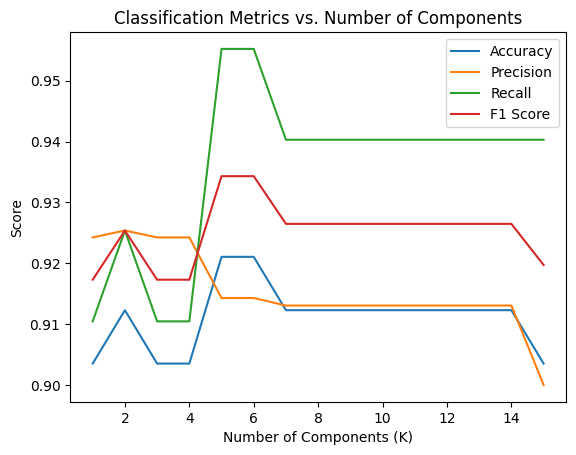

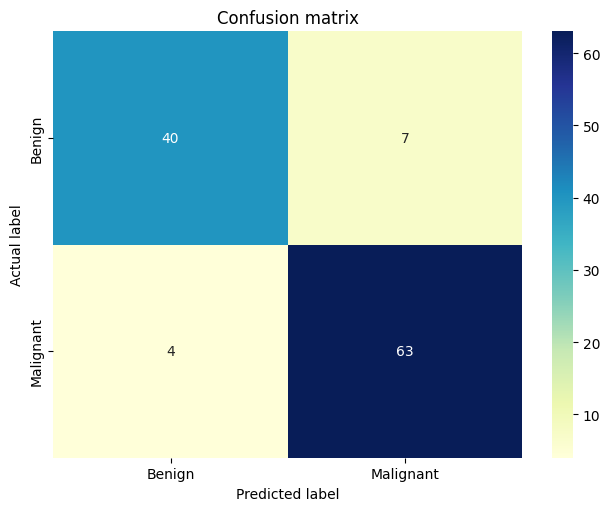

In [50]:
# Standardize the features
X5 = StandardScaler().fit_transform(X)

# Select N values from 1 to 15 for the number of principal components
N = list(range(1, 16))

# Initialize lists to store metrics for each value of N
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for K in N:
    # Perform PCA to reduce the dimensionality
    pca = PCA(n_components=K)
    principalDf = pd.DataFrame(data=pca.fit_transform(X5))

    # Split the data into training and validation sets
    x4_train, x4_test, y4_train, y4_test = train_test_split(principalDf.values, Y, train_size=0.8, test_size=0.2, random_state=0)

    # Perform Gaussian Naive Bayes classification
    classifier = GaussianNB()
    classifier.fit(x4_train, y4_train)

    # Make predictions
    y4_pred = classifier.predict(x4_test)

    # Calculate metrics
    accuracy = accuracy_score(y4_test, y4_pred)
    precision = precision_score(y4_test, y4_pred)
    recall = recall_score(y4_test, y4_pred)
    f1_score = metrics.f1_score(y4_test, y4_pred)

    # Append metrics to respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

    # Print metrics for the current value of K
    print(f"K = {K}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print('\n')

# Plotting the metrics
plt.plot(N, accuracy_list, label='Accuracy')
plt.plot(N, precision_list, label='Precision')
plt.plot(N, recall_list, label='Recall')
plt.plot(N, f1_score_list, label='F1 Score')
plt.xlabel('Number of Components (K)')
plt.ylabel('Score')
plt.title('Classification Metrics vs. Number of Components')
plt.legend()
plt.show()

# Confusion matrix for the final value of K
confusion_matrix_5b = confusion_matrix(y4_test, y4_pred)

# Plot confusion matrix
def plot_confusion_matrix(confusion_matrix, neg_label, pos_label):
    """
    Plots the confusion matrix.

    Parameters:
    confusion_matrix: The 4 values for true negative, false positive, false negative, and true positive (in that order)
    """
    class_names=[neg_label, pos_label] # Name of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)

    # Create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("bottom")
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    plt.tight_layout()
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# Plot the confusion matrix for the final value of K
plot_confusion_matrix(confusion_matrix=confusion_matrix_5b, neg_label='Benign', pos_label='Malignant')
plt.show()
